In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_pickle('../data/wss_n1')

In [3]:
result = df.groupby('itapudid').count().reset_index()
itapudid = result[result.max1stdetectwssc>3000].itapudid

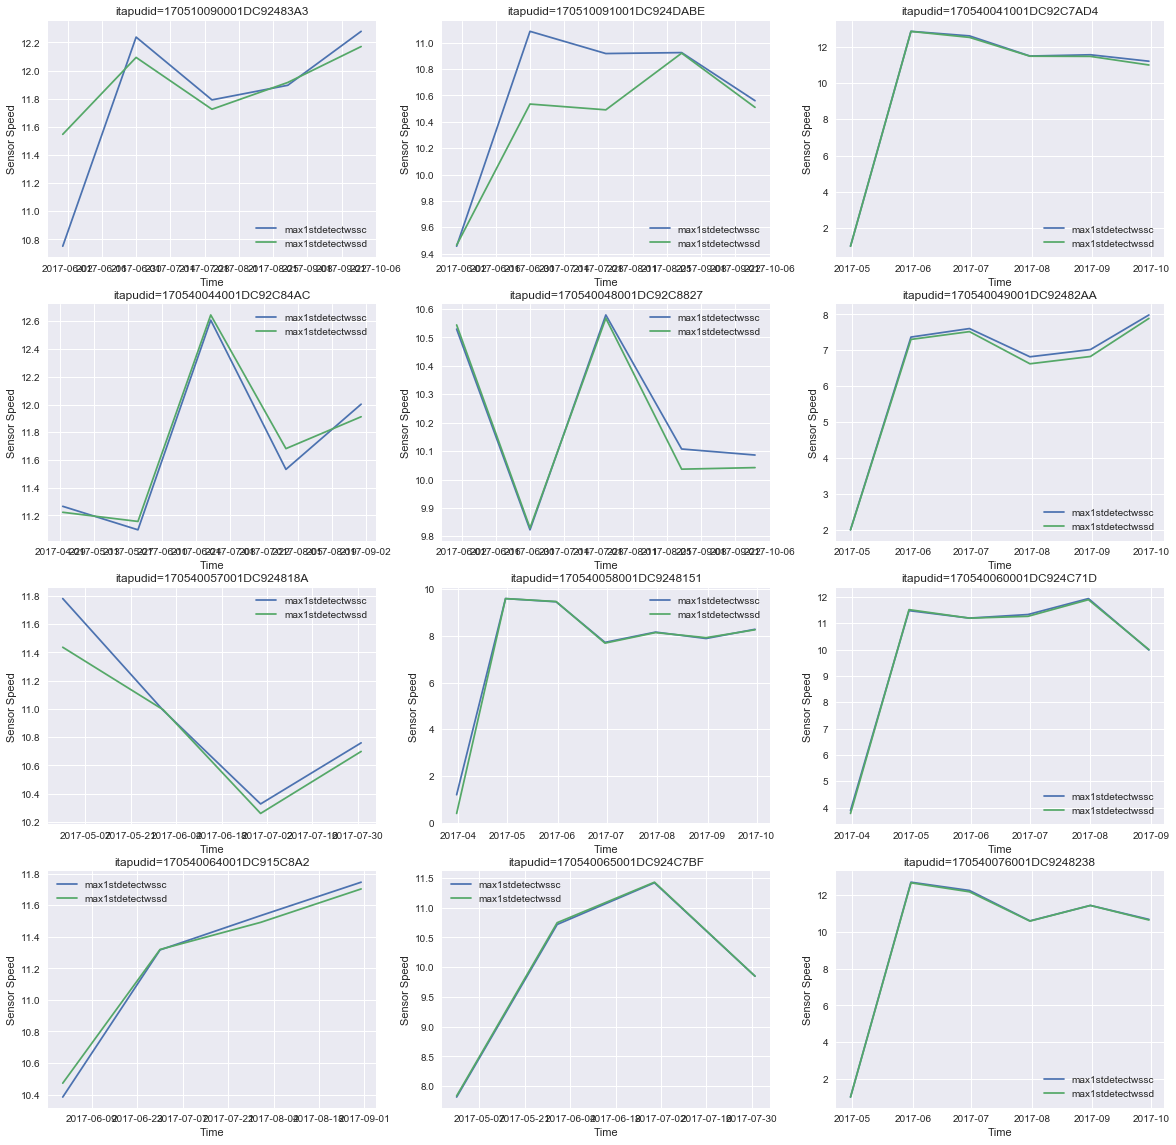

In [4]:
num = 1
plt.figure(figsize=(20, 20));
for i in itapudid:
    df1 = df[df['itapudid'] == i]
    df1 = df1.sort_values(['eventtime']).dropna(axis=0, how='any').reset_index(drop = True)
    df1 = df1[df1['eventtime']!='1970-01-01'].reset_index(drop = True)
    df1 = df1.set_index(pd.DatetimeIndex(df1['eventtime']))
    df1 = df1.resample("M").agg(['mean'])
    df1 = df1[['max1stdetectwssc', 'max1stdetectwssd']]
    plt.subplot(4,3,num)
    plt.plot(df1.index.values, df1['max1stdetectwssc'], label='max1stdetectwssc')
    plt.plot(df1.index.values, df1['max1stdetectwssd'], label='max1stdetectwssd')
    plt.legend()
    plt.ylabel('Sensor Speed')
    plt.xlabel('Time')
    plt.title('itapudid=%s' % (i))
    num += 1
plt.show()

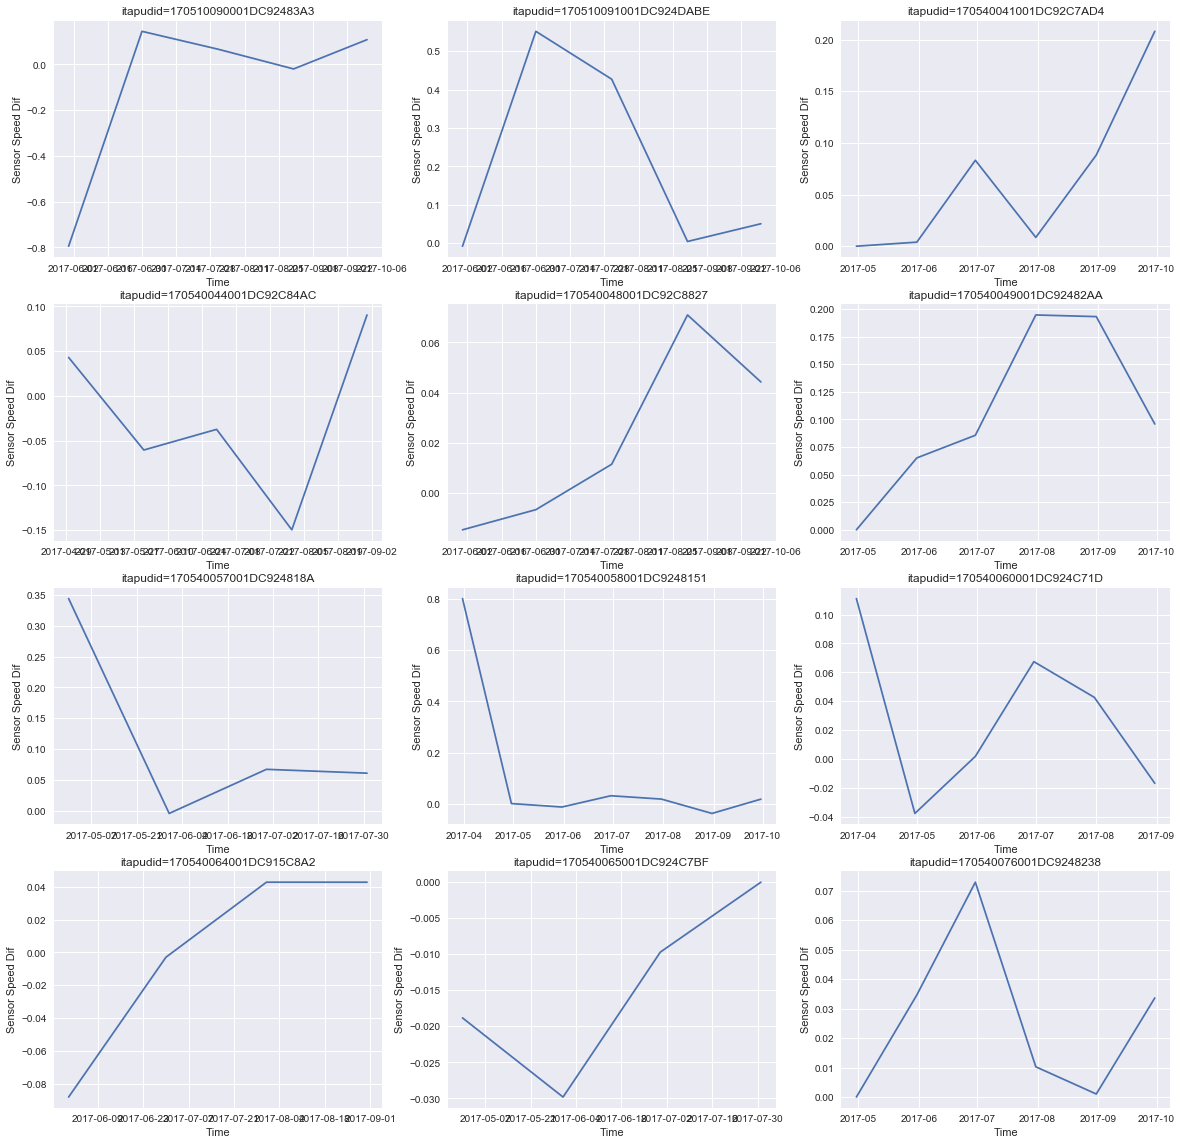

In [5]:
num = 1
plt.figure(figsize=(20, 20));
for i in itapudid:
    df1 = df[df['itapudid'] == i]
    df1 = df1.sort_values(['eventtime']).dropna(axis=0, how='any').reset_index(drop = True)
    df1 = df1[df1['eventtime']!='1970-01-01'].reset_index(drop = True)
    df1 = df1.set_index(pd.DatetimeIndex(df1['eventtime']))
    df1 = df1.resample("M").agg(['mean'])
    df1 = df1[['max1stdetectwssc', 'max1stdetectwssd']]
    plt.subplot(4,3,num)
    plt.plot(df1.index.values, df1['max1stdetectwssc'] - df1['max1stdetectwssd'])
    plt.ylabel('Sensor Speed Dif')
    plt.xlabel('Time')
    plt.title('itapudid=%s' % (i))
    num += 1
plt.show()